# Comparing data sets with specific filters

In [30]:
"""import packages you need"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

# from xgboost import XGBRegressor
from IPython.display import clear_output
# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset
# torch.manual_seed(20210614)

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import itertools
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model

import tensorflow

### There are some functions bellow:
- a NN function with multiple hidden layers, it can predict multiple outputs at the same time
- ParamTable_condition that is used when we have multiple trials of each laser combinations

In [31]:
def NN_Multi_Hidden_Layers(Xtrain, Y_train, Xtest, Y_test, case):
    no_outputs = Y_train.shape[1]
    tensorflow.random.set_seed(20210614)
    input = Input(shape=(Xtrain.shape[1],))
    # input = Input(shape=(5,))
    x = Dense(128, activation='relu')(input)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    # x = Dense(16, activation='relu')(x)
    output = Dense(no_outputs)(x)
    model = Model(inputs=input, outputs=output)
    model.compile(optimizer='adam', loss='mse')


    model.fit(Xtrain, (Y_train) , epochs=1000, batch_size=128 ,verbose=0)
    pred = model.predict(Xtest)
    pred_case = model.predict(case)
    
    error = ((mean_squared_error(pred[:,0], Y_test[:,0])*100).round(3), 
           (mean_squared_error(pred[:,1], Y_test[:,1])*100).round(3),
            (mean_squared_error(pred[:,2], Y_test[:,2])*100).round(3)
            )

    Rsquare = ((r2_score(pred[:,0], Y_test[:,0])*100).round(3), 
             (r2_score(pred[:,1], Y_test[:,1])*100).round(3),
              (r2_score(pred[:,2], Y_test[:,2])*100).round(3)
              )
    
    return error , Rsquare, pred_case

In [32]:
def ParamTable_condition(Combination_df, AllData_df):
        result = []
        indexes = []
        for i in range(Combination_df.shape[0]): 
            condition1 = (AllData_df.Frequency == Combination_df.Frequency.iloc[i])
            condition2 = (AllData_df.Speed == Combination_df.Speed.iloc[i])
            condition3 = (AllData_df.Amplitude == Combination_df.Amplitude.iloc[i])
            condition4 = (AllData_df.Passes == Combination_df.Passes.iloc[i])
            condition5 = (AllData_df.Focal_Position == Combination_df.Focal_Position.iloc[i])
            res = condition1**2 + condition2**2 + condition3**2 + condition4**2+ condition5**2
            index = (np.where( res == 5 ))[0]
            indexes.extend(index.tolist())
        for j in indexes:
            case = np.r_[(AllData_df.iloc[j])]
            result.append(case)  
        DATA = np.array(result)  
        if DATA.shape[0] > 0 : 
            df_results = pd.DataFrame(DATA, columns = 
        ['Frequency', 'Speed', 'Amplitude', 'Passes', 'Focal_Position', 'Depth'])
            return df_results
        else:
            return np.array(np.zeros([7]))

In [47]:

###################  Include top and bot widths 
df_0 = pd.read_csv('RawData/two_widths/Param0_2width.csv')
df_1 = pd.read_csv('RawData/two_widths/Param1_2width.csv')
df_2 = pd.read_csv('RawData/two_widths/Param2_2width.csv')
df_3 = pd.read_csv('RawData/two_widths/Param3_2width.csv')
df_4 = pd.read_csv('RawData/two_widths/Param4_2width.csv')

###################

# Exp1 = pd.read_excel('RawData/Machine Learning Data_01.xlsx')
# Exp1.dropna(how='any', axis=1, inplace = True)

df1 = pd.concat([df_0, df_1, df_2, df_3, df_4], axis = 0, ignore_index = True)


grp = df1.groupby(['Frequency', 'Speed', 'Amplitude','Passes','Focal_Position'], as_index=False).mean()
grouped_Exp = grp


In [48]:
###------- normalizing data 
normalizer = MinMaxScaler()
grouped_norm = normalizer.fit_transform(grouped_Exp)

grouped_scl = pd.DataFrame(grouped_norm, columns=grouped_Exp.columns )

In [49]:
Model_Test = pd.read_excel('RawData/two_widths/Comp_Exp_NN.xlsx')
# A.dropna(how='any', axis=0, inplace =True)


# Model_Test = A.drop(['Angle' ], axis = 'columns')
# Model_Test = Model_Test.reset_index(drop=True)

case_norm = normalizer.transform(Model_Test.iloc[:,1:9])
case_scl = pd.DataFrame(case_norm, columns=grouped_Exp.columns )
case_scl

,Frequency,Speed,Amplitude,Passes,Focal_Position,Depth,Top_width,Bot_width
0,0.093336,0.098286,0.763636,0.056800,1.0,0.497169,0.715517,0.450900
1,0.080107,0.087429,1.454545,0.063400,1.0,0.495670,0.709265,0.433968
2,0.175971,0.180571,0.881818,0.045000,1.0,0.329553,0.835538,0.696477
3,0.415207,0.334286,0.572727,0.115667,1.0,0.490057,1.058432,0.763058
4,0.074079,0.042857,1.127273,0.071867,1.0,0.430997,1.166045,0.945253
5,0.078057,0.063429,1.236364,0.067867,1.0,0.347704,1.209747,1.100493
6,0.070600,0.075714,1.290909,0.070200,1.0,0.410827,1.095274,0.900268
7,0.079479,0.085429,1.163636,0.064333,1.0,0.314936,0.590974,0.470559
8,0.258829,0.250857,0.645455,0.039000,1.0,0.382164,1.136377,0.987800
9,0.080414,0.086571,1.209091,0.062400,1.0,0.381720,1.132925,0.986248


In [50]:
losses = []
R2es = []
case_pred = []

normalizer.fit_transform(df1.iloc[:, 5:8])
# train = AllExp_scl

for i in range(100):
    train, Test = train_test_split(grouped_scl, test_size = 0.01)
#     train = ParamTable_condition(Train, AllExp_scl)
    loss, R2, pred = NN_Multi_Hidden_Layers(train.iloc[:,0:5], np.array(train.iloc[:,5:8]), 
                             Test.iloc[:,0:5], np.array(Test.iloc[:,5:8]), np.array(case_scl.iloc[:,0:5]))
    
    rescl_pred = normalizer.inverse_transform(pred)
    losses.append(loss)
    R2es.append(R2)
    case_pred.append(rescl_pred)
    


In [51]:
### Saving different point predictions and calculating their mean and std
B = np.array(case_pred)

meanDpt_pred = []
stdDpt_pred = []
meanTopWidth_pred = []
stdTopWidth_pred = []
meanBotWidth_pred = []
stdBotWidth_pred = []

for l in range(B.shape[1]):
    meanDpt_pred.append(B[:, l, 0].mean())
    stdDpt_pred.append(B[:, l, 0].std(ddof=1))
    meanTopWidth_pred.append(B[:, l, 1].mean())
    stdTopWidth_pred.append(B[:, l, 1].std(ddof=1))
    meanBotWidth_pred.append(B[:, l, 2].mean())
    stdBotWidth_pred.append(B[:, l, 2].std(ddof=1))
    
    

In [52]:


stdDpt_pred = [element * 2 for element in stdDpt_pred]
stdTopWidth_pred = [element * 2 for element in stdTopWidth_pred]
stdBotWidth_pred = [element * 2 for element in stdBotWidth_pred]


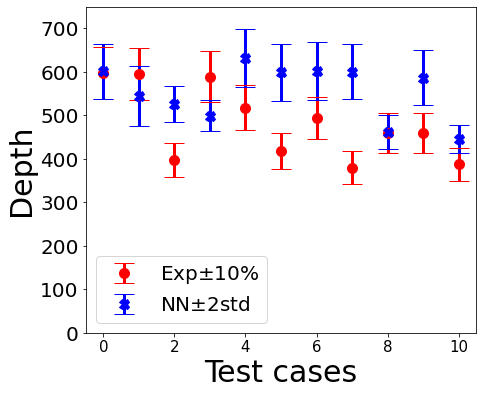

In [54]:
fig = plt.figure(figsize=(7,6))

ax1 = fig.add_subplot(111)


# ax1.plot(Model_Test.iloc[:,6], 'or', ms=15, label='Exp, depth')


ax1.errorbar(range(11), Model_Test.iloc[:,6],
            yerr= Model_Test.iloc[:,6]*0.10,
             capsize=10,
            fmt='or', ms=10, lw =3, label = 'Exp$\pm$10%')

ax1.errorbar(range(11), meanDpt_pred,
            yerr= stdDpt_pred,
             capsize=10,
            fmt='Xb', ms=10, lw =3, label = 'NN$\pm$2std')

ax1.legend(loc=0, fontsize=20)

ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=15)

ax1.set_ylabel('Depth', fontsize=30)

ax1.set_xlabel('Test cases', fontsize=30)
plt.savefig('Graphs/Depth_nn_test.png',bbox_inches='tight')
plt.ylim(0,750)
plt.show()

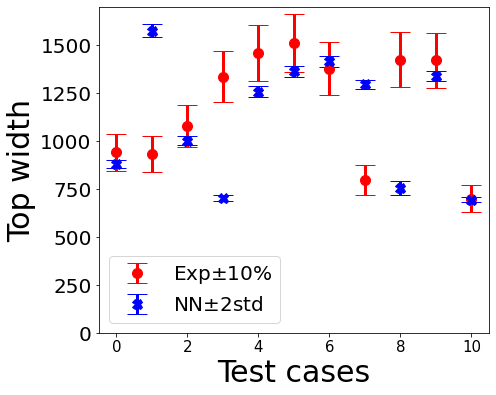

In [55]:
fig = plt.figure(figsize=(7,6))

ax2 = fig.add_subplot(111)

ax2.errorbar(range(11), Model_Test.iloc[:,7],
            yerr= Model_Test.iloc[:,7]*0.10,
             capsize=10,
            fmt='or', ms=10, lw =3, label = 'Exp$\pm$10%')

ax2.errorbar(range(11), meanTopWidth_pred,
            yerr= stdTopWidth_pred,
             capsize=10,
            fmt='Xb', ms=10, lw =3, label = 'NN$\pm$2std')

ax2.legend(loc=0, fontsize=20)

ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=15)

ax2.set_ylabel('Top width', fontsize=30)

ax2.set_xlabel('Test cases', fontsize=30)
plt.ylim(0,1700)
plt.savefig('Graphs/Topwidth_nn_test.png',bbox_inches='tight')

plt.show()


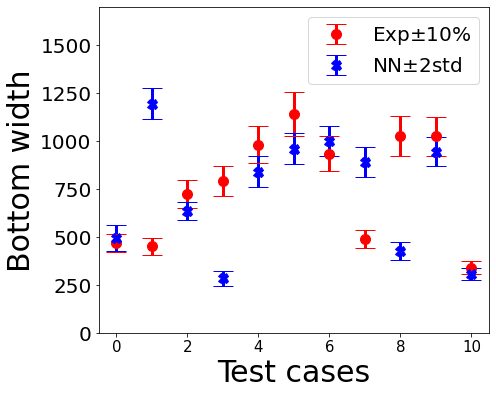

In [56]:
fig = plt.figure(figsize=(7,6))

ax2 = fig.add_subplot(111)

ax2.errorbar(range(11), Model_Test.iloc[:,8],
            yerr= Model_Test.iloc[:,8]*0.10,
             capsize=10,
            fmt='or', ms=10, lw =3, label = 'Exp$\pm$10%')

ax2.errorbar(range(11), meanBotWidth_pred,
            yerr= stdBotWidth_pred,
             capsize=10,
            fmt='Xb', ms=10, lw =3, label = 'NN$\pm$2std')

ax2.legend(loc=0, fontsize=20)

ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=15)

ax2.set_ylabel('Bottom width', fontsize=30)

ax2.set_xlabel('Test cases', fontsize=30)
plt.ylim(0,1700)
plt.savefig('Graphs/Botwidth_nn_test.png',bbox_inches='tight')

plt.show()



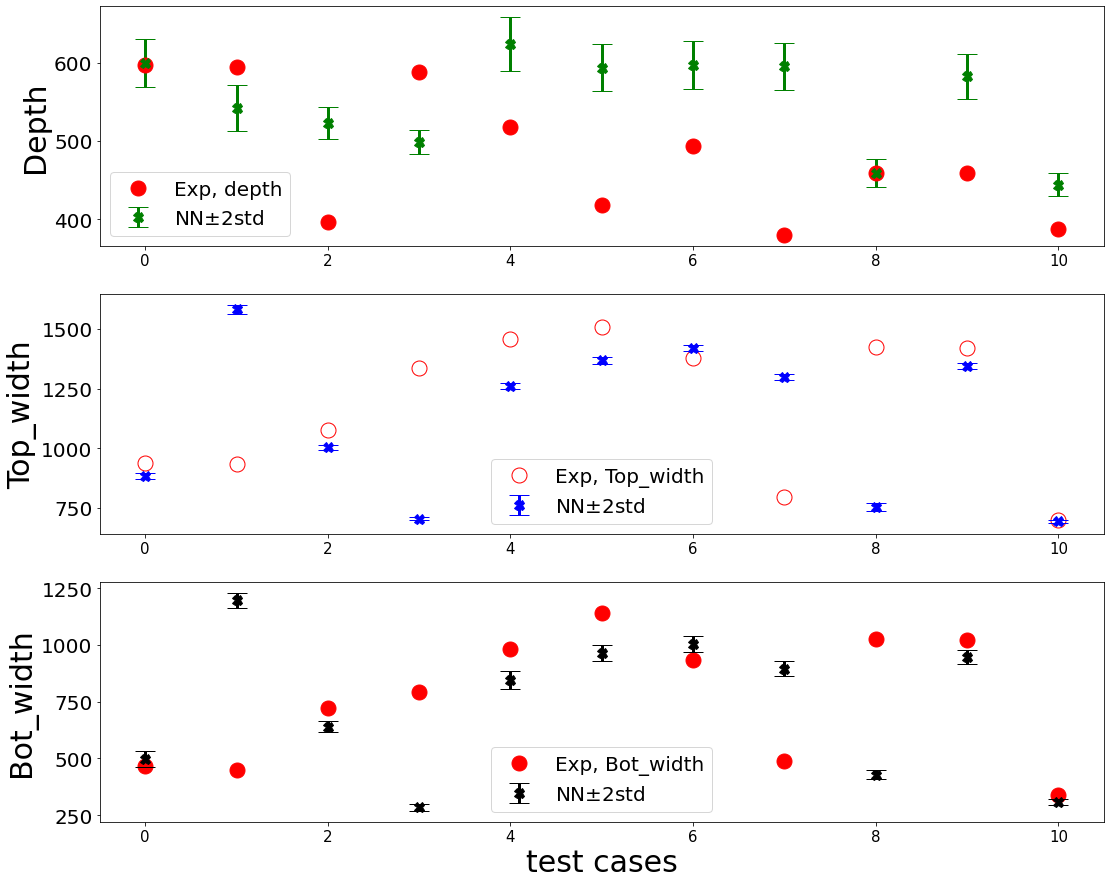

In [29]:
#### If we want three of them in different rows
fig = plt.figure(figsize=(18,15))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(Model_Test.iloc[:,6], 'or', ms=15, label='Exp, depth')


ax1.errorbar(range(11), meanDpt_pred,
            yerr= stdDpt_pred,
             capsize=10,
            fmt='Xg', ms=10, lw =3, label = 'NN$\pm$2std')

ax2.plot(Model_Test.iloc[:,7], 'or',mfc = 'None',  ms=15, label='Exp, Top_width')


ax2.errorbar(range(11), meanTopWidth_pred,
            yerr= stdTopWidth_pred,
             capsize=10,
            fmt='Xb', ms=10, lw =3, label = 'NN$\pm$2std')


ax3.plot(Model_Test.iloc[:,8], 'or', ms=15, label='Exp, Bot_width')


ax3.errorbar(range(11), meanBotWidth_pred,
            yerr= stdBotWidth_pred,
             capsize=10,
            fmt='Xk', ms=10, lw =3, label = 'NN$\pm$2std')

ax1.legend(loc=0, fontsize=20)
ax2.legend(loc=0, fontsize=20)
ax3.legend(loc=0, fontsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='y', labelsize=20)
ax3.tick_params(axis='x', labelsize=15)
ax1.set_ylabel('Depth', fontsize=30)
ax2.set_ylabel('Top_width', fontsize=30)
ax3.set_ylabel('Bot_width', fontsize=30)
ax3.set_xlabel('test cases', fontsize=30)
# plt.savefig('Graphs/TestingData.png',bbox_inches='tight')

plt.show()

# Calculating errors 

In [17]:

depth_error = np.abs(Model_Test.iloc[:,6] - meanDpt_pred) * 100 / Model_Test.iloc[:,6]
topwidth_error = np.abs(Model_Test.iloc[:,7] - meanTopWidth_pred) * 100/ Model_Test.iloc[:,7]
botwidth_error = np.abs(Model_Test.iloc[:,8] - meanBotWidth_pred) * 100 / Model_Test.iloc[:,8]

In [18]:
errors = np.c_[depth_error, topwidth_error, botwidth_error]
error_table = pd.DataFrame(errors.round(3), columns = ['depth_error %', 'topWidth_error %'
                                                      , 'botWidth_error %'])
error_table

,depth_error %,topWidth_error %,botWidth_error %
0,0.649,6.209,6.167
1,8.227,68.891,165.373
2,32.305,7.125,11.820
3,15.321,47.168,63.910
4,21.882,13.796,13.966
5,43.192,9.636,15.637
6,21.983,2.766,7.331
7,58.160,62.521,83.022
8,0.341,47.033,58.187
9,27.714,5.704,7.500


### Plotting the mean of MSE and R2 for different NN trials

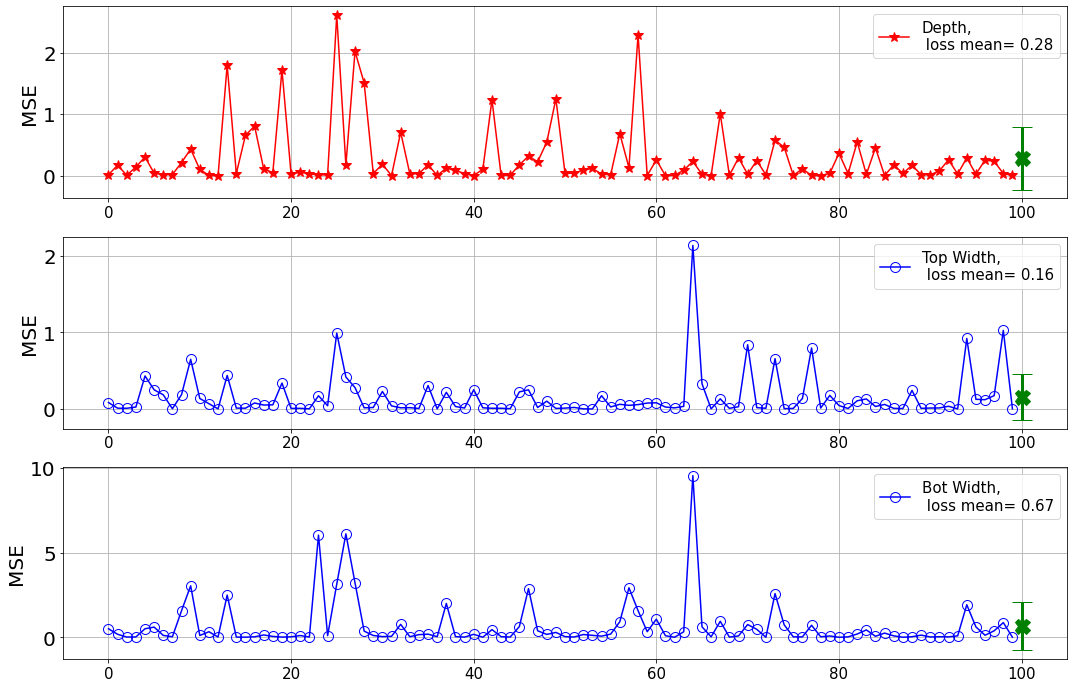

In [36]:
Dpt_loss = [a_tuple[0] for a_tuple in losses]
Topwidth_loss = [a_tuple[1] for a_tuple in losses]
Botwidth_loss = [a_tuple[2] for a_tuple in losses]
# Ang_loss = losses
fig = plt.figure(figsize=(18,12))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(Dpt_loss, '*-r', ms=10, label='Depth,\n loss mean= '+str(np.array(Dpt_loss).mean().round(2)))
ax2.plot(Topwidth_loss, 'o-b', ms=10, mfc="None",\
         label='Top Width,\n loss mean= '+str(np.array(Topwidth_loss).mean().round(2)) )
ax3.plot(Botwidth_loss, 'o-b', ms=10, mfc="None",\
         label='Bot Width,\n loss mean= '+str(np.array(Botwidth_loss).mean().round(2)) )


ax1.errorbar(len(Dpt_loss), np.array(Dpt_loss).mean(),
            yerr=np.array(Dpt_loss).std(ddof=1),
             capsize=10,
            fmt='-Xg', ms=15, lw=3)

ax2.errorbar(len(Topwidth_loss), np.array(Topwidth_loss).mean(),
            yerr=np.array(Topwidth_loss).std(ddof=1),
             capsize=10,
            fmt='-Xg', ms=15, lw=3)

ax3.errorbar(len(Botwidth_loss), np.array(Botwidth_loss).mean(),
            yerr=np.array(Botwidth_loss).std(ddof=1),
             capsize=10,
            fmt='-Xg', ms=15, lw=3)

ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
ax3.legend(fontsize=15)
ax1.set_ylabel('MSE', fontsize=20)
ax2.set_ylabel('MSE', fontsize=20)
ax3.set_ylabel('MSE', fontsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='y', labelsize=20)
ax3.tick_params(axis='x', labelsize=15)
ax1.grid()
ax2.grid()
ax3.grid()
# plt.savefig('Graphs/NN_D_TopW_BotW.png',bbox_inches='tight')

plt.show()

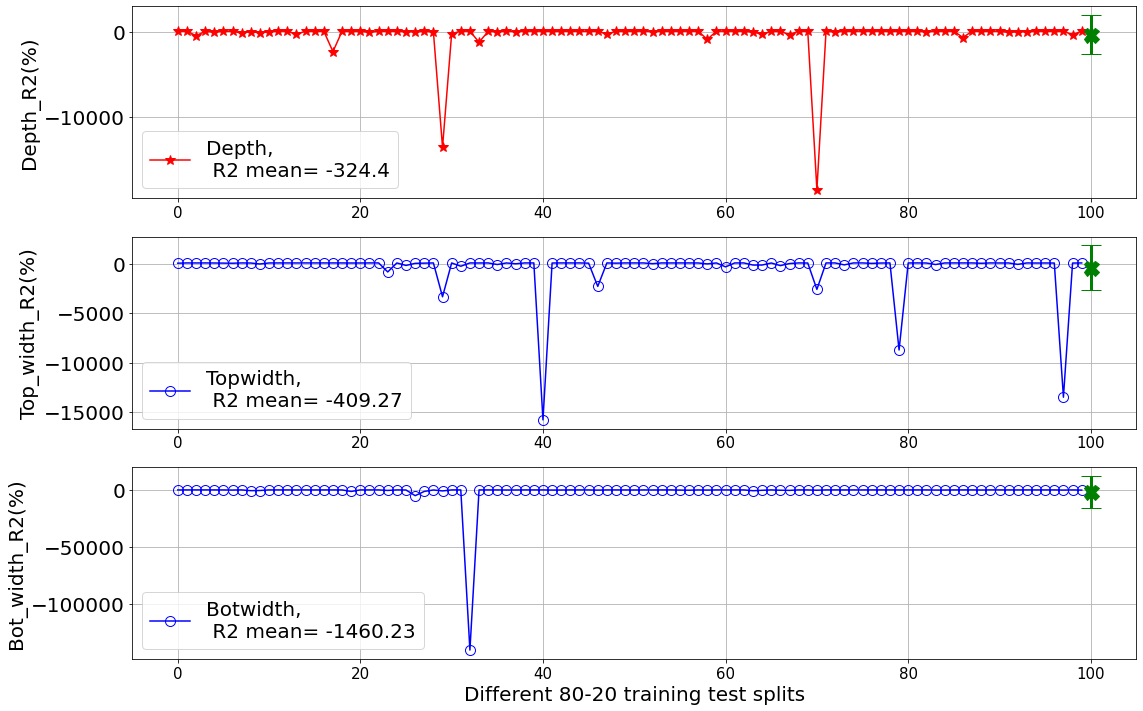

In [37]:
fig = plt.figure(figsize=(18,12))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

Dpt_R2 = [a_tuple[0] for a_tuple in R2es]
Topwidth_R2 = [a_tuple[1] for a_tuple in R2es]
Botwidth_R2 = [a_tuple[2] for a_tuple in R2es]

# Ang_R2 = R2es
ax1.plot(Dpt_R2, '*-r', ms=10, label='Depth,\n R2 mean= '+str(np.array(Dpt_R2).mean().round(2)))
ax2.plot(Topwidth_R2, 'o-b', ms=10, mfc="None", \
         label='Topwidth,\n R2 mean= '+str(np.array(Topwidth_R2).mean().round(2)))

ax3.plot(Botwidth_R2, 'o-b', ms=10, mfc="None", \
         label='Botwidth,\n R2 mean= '+str(np.array(Botwidth_R2).mean().round(2)))

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax3.legend(fontsize=20)

ax3.set_xlabel('Different 80-20 training test splits', fontsize=20)

ax1.errorbar(len(Dpt_R2), np.array(Dpt_R2).mean(),
            yerr=np.array(Dpt_R2).std(ddof=1),
             capsize=10,
            fmt='-Xg', ms=15, lw=3)

ax2.errorbar(len(Topwidth_R2), np.array(Topwidth_R2).mean(),
            yerr=np.array(Topwidth_R2).std(ddof=1),
             capsize=10,
            fmt='-Xg', ms=15, lw =3)

ax3.errorbar(len(Botwidth_R2), np.array(Botwidth_R2).mean(),
            yerr=np.array(Botwidth_R2).std(ddof=1),
             capsize=10,
            fmt='-Xg', ms=15, lw =3)

ax1.set_ylabel('Depth_R2(%)', fontsize=20)
ax2.set_ylabel('Top_width_R2(%)', fontsize=20)
ax3.set_ylabel('Bot_width_R2(%)', fontsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=15)

ax3.tick_params(axis='y', labelsize=20)
ax3.tick_params(axis='x', labelsize=15)
ax1.grid()
ax2.grid()
ax3.grid()
# plt.savefig('Graphs/NN_D_TopW_BotW.png',bbox_inches='tight')


plt.show()



## If we want to see the interval of different predictions of NN


In [40]:
def NN_Multi_Layer_pred(Xtrain, Y_train, case):
#     tensorflow.random.set_seed(20210614)
    no_outputs = Y_train.shape[1]
    
    input = Input(shape=(Xtrain.shape[1],))

    x = Dense(128, activation='relu')(input)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)

    output = Dense(no_outputs)(x)
    model = Model(inputs=input, outputs=output)
    model.compile(optimizer='adam', loss='mse')

    model.fit(Xtrain, (Y_train) , epochs=1000, batch_size=128 ,verbose=0)

    pred_case = model.predict(case)

    return pred_case

In [ ]:
case_pred = []

normalizer.fit_transform(df1.iloc[:, 5:6])
# train = df_scl
train = AllExp_scl
for i in range(100):
    
#     train = ParamTable_condition(train, AllExp_scl)
    pred = NN_Multi_Layer_pred(train.iloc[:,0:5], np.array(train.iloc[:,5:6]), 
                              np.array(case_scl.iloc[:,0:5]))
    rescl_pred = normalizer.inverse_transform(pred)
    case_pred.append(rescl_pred)

In [42]:
B = np.array(case_pred)

meanDpt_pred = []
stdDpt_pred = []
# meanTopWidth_pred = []
# stdTopWidth_pred = []
# meanBotWidth_pred = []
# stdBotWidth_pred = []

for l in range(B.shape[1]):
    meanDpt_pred.append(B[:, l, 0].mean())
    stdDpt_pred.append(B[:, l, 0].std(ddof=1))
#     meanTopWidth_pred.append(B[:, l, 1].mean())
#     stdTopWidth_pred.append(B[:, l, 1].std(ddof=1))
#     meanBotWidth_pred.append(B[:, l, 2].mean())
#     stdBotWidth_pred.append(B[:, l, 2].std(ddof=1))

In [43]:
stdDpt_pred = [element * 2 for element in stdDpt_pred]
# stdTopWidth_pred = [element * 2 for element in stdTopWidth_pred]
# stdBotWidth_pred = [element * 2 for element in stdBotWidth_pred]

## Using all the data for depth prediction

In [57]:
df_0 = pd.read_csv('RawData/Exp/NewData.csv')

df_1 = pd.read_csv('RawData/Exp/ParametricStudy_1.csv')
df_2 = pd.read_csv('RawData/Exp/ParametricStudy_2.csv')
df_3 = pd.read_csv('RawData/Exp/ParametricStudy_3.csv')
df_4 = pd.read_csv('RawData/Exp/ParametricStudy_4.csv')

df1 = pd.concat([df_0, df_1, df_2, df_3, df_4], axis = 0, ignore_index = True)
print(df1.keys())

df1 = df1.drop(['Angle' ], axis = 'columns')
df1 = df1.reset_index(drop=True)

grp = df1.groupby(['Frequency', 'Speed', 'Amplitude','Passes','Focal_Position'],
                  as_index=False).mean()
combined_Exp = grp

###################
combined_Exp = shuffle(combined_Exp)
print(combined_Exp.shape)

###------- normalizing data 
normalizer = MinMaxScaler()
df_norm = normalizer.fit_transform(combined_Exp)

column_names = ['Frequency', 'Speed', 'Amplitude','Passes','Focal_Position', 'Depth']

df_scl = pd.DataFrame(df_norm, columns=column_names )

######################

AllExp_norm = normalizer.transform(df1)

AllExp_scl = pd.DataFrame(AllExp_norm, columns=column_names )
print(AllExp_norm.shape)

Index(['Frequency', 'Speed', 'Amplitude', 'Passes', 'Focal_Position', 'Depth',
       'Angle'],
      dtype='object')
(160, 6)
(238, 6)


In [58]:
Model_Test = pd.read_excel('RawData/two_widths/Comp_Exp_NN.xlsx')
# A.dropna(how='any', axis=0, inplace =True)
print(Model_Test.keys())

# Model_Test = A.drop(['Angle' ], axis = 'columns')
# Model_Test = Model_Test.reset_index(drop=True)

case_norm = normalizer.transform(Model_Test.iloc[:,1:7])
case_scl = pd.DataFrame(case_norm, columns=column_names )
case_scl

Index(['Unnamed: 0', 'Freq.', 'Speed', 'Amp.', 'Passes.', 'Focal Pos',
       'Depth (Exp)', 'Top_width (Exp)', 'Bot_width (Exp)', 'Angle (Exp)',
       'Depth (GAN)', 'Angle (GAN)'],
      dtype='object')


,Frequency,Speed,Amplitude,Passes,Focal_Position,Depth
0,0.093336,0.098286,0.763636,0.110189,1.0,0.498618
1,0.080107,0.087429,1.454545,0.116415,1.0,0.497123
2,0.175971,0.180571,0.881818,0.099057,1.0,0.331485
3,0.415207,0.334286,0.572727,0.165723,1.0,0.491527
4,0.074079,0.042857,1.127273,0.124403,1.0,0.432636
5,0.078057,0.063429,1.236364,0.120629,1.0,0.349584
6,0.070600,0.075714,1.290909,0.122830,1.0,0.412525
7,0.079479,0.085429,1.163636,0.117296,1.0,0.316910
8,0.258829,0.250857,0.645455,0.093396,1.0,0.383944
9,0.080414,0.086571,1.209091,0.115472,1.0,0.383501


In [59]:
def NN_Multi_Layer_pred(Xtrain, Y_train, case):
#     tensorflow.random.set_seed(20210614)
    no_outputs = Y_train.shape[1]
    
    input = Input(shape=(Xtrain.shape[1],))

    x = Dense(128, activation='relu')(input)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)

    output = Dense(no_outputs)(x)
    model = Model(inputs=input, outputs=output)
    model.compile(optimizer='adam', loss='mse')

    model.fit(Xtrain, (Y_train) , epochs=1000, batch_size=128 ,verbose=0)

    pred_case = model.predict(case)

    return pred_case

In [60]:
case_pred = []

normalizer.fit_transform(df1.iloc[:, 5:6])
# train = df_scl
train = AllExp_scl

for i in range(100):
    
#     train = ParamTable_condition(train, AllExp_scl)
    pred = NN_Multi_Layer_pred(train.iloc[:,0:5], np.array(train.iloc[:,5:6]), 
                              np.array(case_scl.iloc[:,0:5]))
    rescl_pred = normalizer.inverse_transform(pred)
    case_pred.append(rescl_pred)

In [61]:
B = np.array(case_pred)

meanDpt_pred = []
stdDpt_pred = []


for l in range(B.shape[1]):
    meanDpt_pred.append(B[:, l, 0].mean())
    stdDpt_pred.append(B[:, l, 0].std(ddof=1))
    
stdDpt_pred = [element * 2 for element in stdDpt_pred]

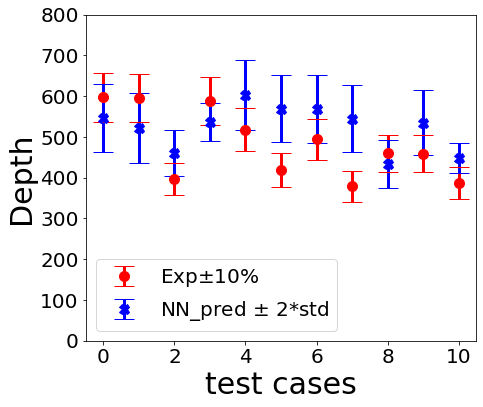

In [66]:
fig = plt.figure(figsize=(7,6))

ax1 = fig.add_subplot(111)


# ax1.plot(Model_Test.iloc[:,6], 'or', ms=15, label='Exp, depth')

ax1.errorbar(range(11), Model_Test.iloc[:,6],
            yerr= Model_Test.iloc[:,6]*0.1,
             capsize=10,
            fmt='or', ms=10, lw =3, label = 'Exp$\pm$10%')

ax1.errorbar(range(11), meanDpt_pred,
            yerr= stdDpt_pred,
             capsize=10,
            fmt='Xb', ms=10, lw =3, label = 'NN_pred $\pm$ 2*std')

ax1.legend(loc=0, fontsize=20)

ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)

ax1.set_ylabel('Depth', fontsize=30)

ax1.set_xlabel('test cases', fontsize=30)
plt.ylim(0, 800)
plt.savefig('Graphs/Depth_nn_all.png',bbox_inches='tight')

plt.show()